Generate training and evaluation data, given 36* 2-dimensional images (size: 128*128).  Data will be produced by displacing each image (x & y translations) of original /fixed image.



In [ ]:
pip install opencv-python

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from numpy import savetxt, loadtxt
from random import randint

import shutil
from skimage import data
from skimage.transform import swirl

import glob
import os
import matplotlib.pyplot as plt 

In [ ]:
path_to_folder='/content/drive/My Drive/2020/Thesis/Data/Chest/'
path_to_segment='/content/drive/My Drive/2020/Thesis/Data/Chest/'

In [ ]:
'''patients for training'''
number_of_patients=26
image_number=list(range(0,number_of_patients)) 

'''duds'''
image_number.remove(8)
image_number.remove(10)
image_number.remove(11)
image_number.remove(15)
image_number.remove(17)
image_number.remove(21)

#affine
image_number.remove(3)

In [ ]:
image_number

[0, 1, 2, 4, 5, 6, 7, 9, 12, 13, 14, 16, 18, 19, 20, 22, 23, 24, 25]

In [ ]:
for j in image_number:
  print(path_to_folder + 'tens(axial)_img_'+ str(j) + '.png')

/content/drive/My Drive/2020/Thesis/Data/Chest/tens(axial)_img_0.png
/content/drive/My Drive/2020/Thesis/Data/Chest/tens(axial)_img_1.png
/content/drive/My Drive/2020/Thesis/Data/Chest/tens(axial)_img_2.png
/content/drive/My Drive/2020/Thesis/Data/Chest/tens(axial)_img_3.png
/content/drive/My Drive/2020/Thesis/Data/Chest/tens(axial)_img_4.png
/content/drive/My Drive/2020/Thesis/Data/Chest/tens(axial)_img_5.png
/content/drive/My Drive/2020/Thesis/Data/Chest/tens(axial)_img_6.png
/content/drive/My Drive/2020/Thesis/Data/Chest/tens(axial)_img_7.png


In [ ]:
for z in image_number:
  print(path_to_folder + 'Patient_' + str(z) +'/tens(axial)_img_'+ str(z) + '.png')

/content/drive/My Drive/2020/Thesis/Data/Patients/Patient_1/tens(axial)_img_1.png
/content/drive/My Drive/2020/Thesis/Data/Patients/Patient_2/tens(axial)_img_2.png
/content/drive/My Drive/2020/Thesis/Data/Patients/Patient_3/tens(axial)_img_3.png


In [ ]:
def translate(image,tx,ty):
  'translate() responsible for translation in x and y directions by given values (tx,ty)'
  rows,cols = fixed_pic.shape
  affine_M = np.float32([[1,0,tx],[0,1,ty]]) #affine_Matrix generation 
  dst = cv2.warpAffine(image,affine_M,(cols,rows)) #warped image

  return dst, affine_M


In [ ]:
def rotation(image,rot_Z):
  'rotation() responsible for rotation about z-axis by given values'
  rows,cols = fixed_pic.shape
  
  affine_M = cv2.getRotationMatrix2D((cols/2,rows/2),rot_Z,1) #affine_Matrix generation 
  dst = cv2.warpAffine(image,affine_M,(cols,rows)) #warped image

  return dst, affine_M

In [ ]:
data_amount=range(150) #amount of warped images produced per fixed image 
train_image_dir='/content/drive/My Drive/2020/Thesis/Data/Voxel_Training/Siddon/Chest/Patient_'
test_image_dir='/content/drive/My Drive/2020/Thesis/Data/Voxel_Testing/Siddon/Chest/Patient_'

In [ ]:
seg_flag=True
for j in image_number:   #iterates through each patient (beginning at patient 0)
  #fixed_pic = cv2.imread(path_to_folder + 'tens(axial)_img_'+ str(j) + '.png',0)
  fixed_pic = cv2.imread(path_to_folder + 'Patient_' + str(j) +'/tens(coronal)_img_'+ str(j) + '.png',0)
  if seg_flag:
    segment = cv2.imread(path_to_segment + 'Patient_' + str(j) + '/normalised_seg_' + str(j) + '.png',0)
  '''29/09/2020'''
  #fixed_pic = cv2.imread(path_to_folder + 'Siddon_' + str(j) +'/tens(axial)_img_'+ str(j) + '.png',0)
  '''29/09/2020'''

  for k in data_amount:
    tx=randint(-10,10)     #random_x_translation 
    ty=randint(-10,10)     #random_y_translation
    rot_Z=randint(-20,20)  #random_z_rotation

    options=randint(1,3)

    if options==1: #translate only
      #warped_image, matrix=translate(fixed_pic,tx,ty)
      vol_data, matrix=translate(fixed_pic,tx,ty)
      if seg_flag:
        seg, matrix_seg=translate(segment,tx,ty)

    elif options==2: #rotate only
      #warped_image, matrix=rotation(fixed_pic,rot_Z)
      vol_data, matrix=rotation(fixed_pic,rot_Z)
      if seg_flag:
        seg, matrix_seg=rotation(segment,rot_Z)

    else: #translate followed by rotation
      #warped_image, matrix=translate(fixed_pic,tx,ty)
      #warped_image, matrix=rotation(warped_image,rot_Z)
      vol_data, matrix=translate(fixed_pic,tx,ty)
      vol_data, matrix=rotation(vol_data,rot_Z)

      if seg_flag:
        seg, matrix_seg=translate(segment,tx,ty)
        seg, matrix_seg=rotation(seg,rot_Z)

       
    if seg_flag:
      np.savez(train_image_dir+'affine/'+'Patient_'+str(j)+ '_' + str(k),vol_data=vol_data, seg=seg)
    else:
      np.savez(train_image_dir+'X/'+'Patient_'+str(j)+ '_' + str(k),vol_data=vol_data)

In [ ]:
print(path_to_folder + 'Patient_' + str(j) +'/tens(coronal)_img_'+ str(j) + '.png')
print(path_to_segment + 'Patient_' + str(j) + '/lung_segment_' + str(j) + '.png')

/content/drive/My Drive/2020/Thesis/Data/Chest/Patient_1/tens(coronal)_img_1.png
/content/drive/My Drive/2020/Thesis/Data/Chest_improved/Patient_1/lung_segment_1.png


In [ ]:
'''atlas generation'''
atlas_patient='3'
atlas_dir='/content/drive/My Drive/2020/Thesis/Data/Chest/Patient_'+str(atlas_patient)+'/tens(coronal)_img_'+str(atlas_patient)+'.png'
atlas_dir_seg= '/content/drive/My Drive/2020/Thesis/Data/Chest/Patient_'+str(atlas_patient)+'/normalised_seg_'+str(atlas_patient)+'.png'

vol = cv2.imread(atlas_dir,0)
seg = cv2.imread(atlas_dir_seg,0)

np.savez('/content/drive/My Drive/2020/Thesis/Data/atlas',vol=vol, seg=seg)

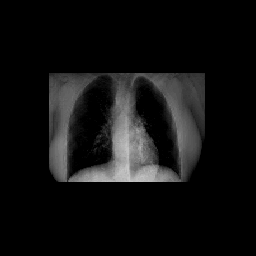

In [ ]:
atlas_name='/content/drive/My Drive/2020/Thesis/Data/atlas.npz'
atlas = np.load(atlas_name)['vol']
cv2_imshow(atlas)

In [ ]:
'''Data_Check'''
data_dir_train='/content/drive/My Drive/2020/Thesis/Data/Voxel_Training/Siddon/Chest/Patient_X'
#data_dir_test='/content/drive/My Drive/2020/Thesis/Data/Voxel_Testing/Siddon/Chest/Patient_X'

train_vol_names = glob.glob(os.path.join(data_dir_train, '*.npz'))
#test_vol_names = glob.glob(os.path.join(data_dir_test, '*.npz'))

X = np.load(train_vol_names[0])['vol_data']
#Y = np.load(test_vol_names[0])['vol_data']

X_seg = np.load(train_vol_names[0])['seg']
#Y_seg = np.load(test_vol_names[0])['seg']

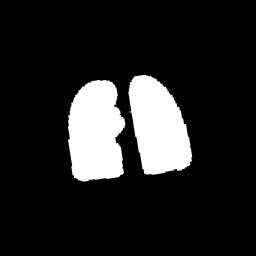

In [ ]:
cv2_imshow(X_seg)

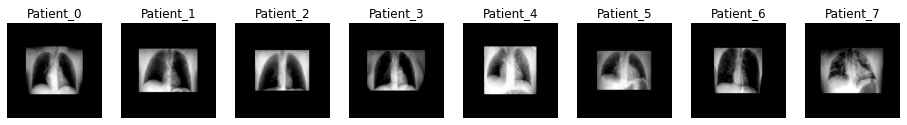

In [ ]:
fig=plt.figure(figsize=(16, 16))
for patient in range(0, 8):
  if patient == (8 or 10 or 11 or 15 or 17 or 21):
    continue 
  else:
    image=cv2.imread(path_to_folder + 'Patient_' + str(patient) +'/tens(coronal)_img_'+ str(patient) + '.png',0)

    fig.add_subplot(2, 8, patient+1)
    plt.imshow(image,cmap='gray')
    plt.title('Patient_' + str(patient))
    plt.axis('off')

plt.show()

In [ ]:
x=cv2.imread(path_to_folder + 'Patient_0/tens(coronal)_img_0.png',0)
y=cv2.imread(path_to_folder + 'Patient_1/tens(coronal)_img_1.png',0)
v=cv2.imread(path_to_folder + 'Patient_2/tens(coronal)_img_2.png',0)

In [ ]:
mean_ref=x.max()
y_mean=y.max()
v_mean=v.mean()

In [ ]:
scaled_image_0= y*(mean_ref/y_mean)
scaled_image_1= v*(mean_ref/v_mean)

In [ ]:
scaled_image_0.max()

243.0

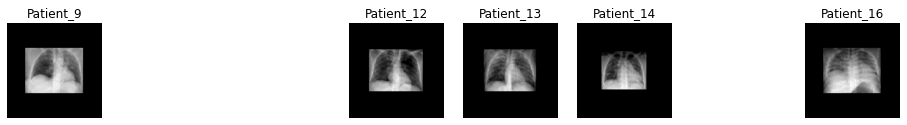

In [ ]:
fig=plt.figure(figsize=(16, 16))
for patient in range(8, 17):
  if ((patient == 8)  or (patient == 10) or (patient == 11) or (patient == 15) or (patient == 17) or (patient == 21)):
    continue 
  image=cv2.imread(path_to_folder + 'Patient_' + str(patient) +'/tens(coronal)_img_'+ str(patient) + '.png',0)

  fig.add_subplot(2, 8, (patient-9)+1)
  plt.imshow(image,cmap='gray')
  plt.title('Patient_' + str(patient))
  plt.axis('off')

plt.show()

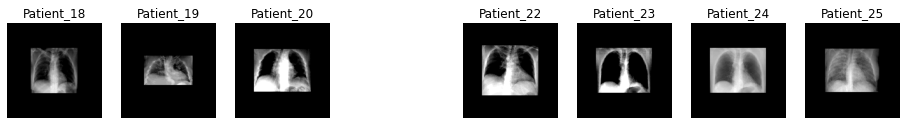

In [ ]:
fig=plt.figure(figsize=(16, 16))
for patient in range(17, 26):
  if ((patient == 8)  or (patient == 10) or (patient == 11) or (patient == 15) or (patient == 17) or (patient == 21)):
    continue 
  image=cv2.imread(path_to_folder + 'Patient_' + str(patient) +'/tens(coronal)_img_'+ str(patient) + '.png',0)

  fig.add_subplot(2, 8, (patient-10)+1)
  plt.imshow(image,cmap='gray')
  plt.title('Patient_' + str(patient))
  plt.axis('off')

plt.show()

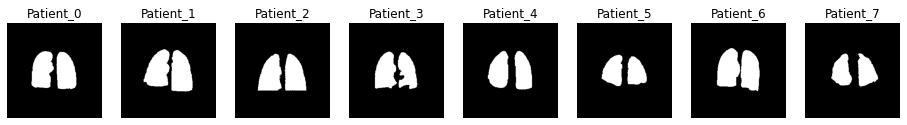

In [ ]:
fig=plt.figure(figsize=(16, 16))
for patient in range(0, 8):
  if ((patient == 8)  or (patient == 10) or (patient == 11) or (patient == 15) or (patient == 17) or (patient == 21)):
    continue 
  image=cv2.imread(path_to_segment + 'Patient_' + str(patient) + '/normalised_seg_' + str(patient) + '.png',0)

  fig.add_subplot(2, 8, patient+1)
  plt.imshow(image,cmap='gray')
  plt.title('Patient_' + str(patient))
  plt.axis('off')

plt.show()

plt.show()

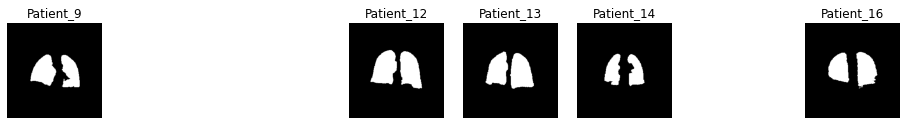

In [ ]:
fig=plt.figure(figsize=(16, 16))
for patient in range(8, 17):
  if ((patient == 8)  or (patient == 10) or (patient == 11) or (patient == 15) or (patient == 17) or (patient == 21)):
    continue 
  image=cv2.imread(path_to_segment + 'Patient_' + str(patient) + '/normalised_seg_' + str(patient) + '.png',0)

  fig.add_subplot(2, 8,(patient-9)+1)
  plt.imshow(image,cmap='gray')
  plt.title('Patient_' + str(patient))
  plt.axis('off')

plt.show()

plt.show()

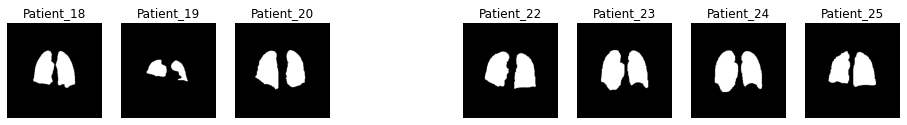

In [ ]:
fig=plt.figure(figsize=(16, 16))
for patient in range(17, 26):
  if ((patient == 8)  or (patient == 10) or (patient == 11) or (patient == 15) or (patient == 17) or (patient == 21)):
    continue 
  image=cv2.imread(path_to_segment + 'Patient_' + str(patient) + '/normalised_seg_' + str(patient) + '.png',0)

  fig.add_subplot(2, 8,(patient-10)+1)
  plt.imshow(image,cmap='gray')
  plt.title('Patient_' + str(patient))
  plt.axis('off')

plt.show()

plt.show()

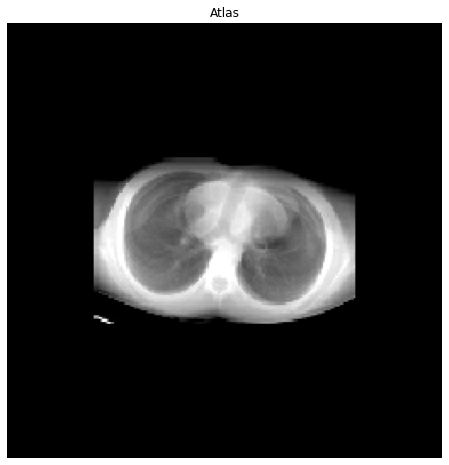

Size (256, 256)


In [ ]:
fig=plt.figure(figsize=(8, 8))
plt.imshow(atlas_png,cmap='gray')
plt.title('Atlas')
plt.axis('off')
plt.show()

print('Size', atlas_png.shape)